## **Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from collections import Counter

## **Data Preparation**

### Load The Dataset

In [2]:
df = pd.read_csv("income.csv")
df

,Year,Transaction_ID,DateTime,Amount
0,2023,6335222736,2023-06-26 15:29:00,30.0
1,2023,6373837822,2023-07-05 15:34:00,40.0
2,2023,6463686199,2023-07-23 16:16:00,27.0
3,2023,6491954651,2023-07-29 18:45:00,28.5
4,2023,6569054048,2023-08-01 14:24:00,25.0
...,...,...,...,...
71,2025,14937686550,2025-10-09 05:41:15,113.5
72,2025,14937686551,2025-10-10 02:04:10,305.0
73,2026,14937686552,2025-10-16 17:37:37,65.0
74,2026,14937686553,2025-10-17 18:02:27,65.0


### Information About The Dataset

In [3]:
print("--- General Information about the Dataset ---")
print(df.info())

--- General Information about the Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            76 non-null     int64  
 1   Transaction_ID  76 non-null     int64  
 2   DateTime        76 non-null     object 
 3   Amount          76 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ KB
None


### Drop Unnecessary Columns 

In [4]:
df = df.drop(columns=["Year"])
df

,Transaction_ID,DateTime,Amount
0,6335222736,2023-06-26 15:29:00,30.0
1,6373837822,2023-07-05 15:34:00,40.0
2,6463686199,2023-07-23 16:16:00,27.0
3,6491954651,2023-07-29 18:45:00,28.5
4,6569054048,2023-08-01 14:24:00,25.0
...,...,...,...
71,14937686550,2025-10-09 05:41:15,113.5
72,14937686551,2025-10-10 02:04:10,305.0
73,14937686552,2025-10-16 17:37:37,65.0
74,14937686553,2025-10-17 18:02:27,65.0


### Format Data Type

In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df['Date'] = df['DateTime'].dt.date
df = df.drop('DateTime', axis=1)


### First 5 Rows Of The Dataset

In [6]:
print("\n--- First 5 Rows of the Dataset ---")
df.head()


--- First 5 Rows of the Dataset ---


,Transaction_ID,Amount,Date
0,6335222736,30.0,2023-06-26
1,6373837822,40.0,2023-07-05
2,6463686199,27.0,2023-07-23
3,6491954651,28.5,2023-07-29
4,6569054048,25.0,2023-08-01


### Last 5 Rows Of The Dataset

In [7]:
print("\n--- last 5 Rows of the Dataset ---")
df.tail()


--- last 5 Rows of the Dataset ---


,Transaction_ID,Amount,Date
71,14937686550,113.5,2025-10-09
72,14937686551,305.0,2025-10-10
73,14937686552,65.0,2025-10-16
74,14937686553,65.0,2025-10-17
75,14937686554,115.5,2025-10-21


### Data Types

In [8]:
print("\n--- data types of the Dataset ---")
df.dtypes


--- data types of the Dataset ---


Transaction_ID      int64
Amount            float64
Date               object
dtype: object

### Unique Values

In [9]:
print("\n--- Unique Values per Column ---")
df.nunique()


--- Unique Values per Column ---


Transaction_ID    76
Amount            43
Date              72
dtype: int64

### Missing Values

In [10]:
print("\n--- Missing Values per Column ---")
df.isnull().sum()


--- Missing Values per Column ---


Transaction_ID    0
Amount            0
Date              0
dtype: int64

### Duplicates

In [11]:
print("\n--- Duplicates ---")
print(f"{df.duplicated().sum()} duplicates")


--- Duplicates ---
0 duplicates


### Insights

The dataset contains 76 individual transactions recorded between June 2023 and October 2025 with no missing values and no duplicate records.

Key columns include 'Date', 'Transaction_ID' and 'Amount, 'Year' column were dropped due to redundancy and 'DateTime' was formatted to 'yyyy-mm-dd' and renamed 'Date'

There are 72 unique dates and 76 unique transaction IDs meaning only four days included multiple sales.

43 unique transaction values show an increase in price diversity compared with earlier analysis which had 29 unique values. The transactions indicate clustering of prices is likely due to standard pricing tiers or price rounding (e.g. £20, £40, £50), which is common on resale platforms where human psychology tends to favour whole or rounded numbers when setting prices.

The dataset is still limited to transaction data and does not include categorical details such as item type, brand or category restricting further analysis on:

- Category performance

- Inventory composition and turnover

- Seasonal pricing behaviour

- Buyer preferences

Although the dataset remains relatively small, the longer time frame and improved transaction frequency provide a clearer picture of overall business progress. The wider price distribution and denser data coverage make it easier to observe sales trends and pricing evolution.

The absence of customer-level information such as buyer location or repeat purchase behaviour continues to prevent analysis of customer patterns, though the increase in sales activity suggests a more stable and consistent business operation.


## **Exploratory Data Analysis**

### Number Of Transactions

In [12]:
print("\n--- Number of Transactions ---")
print("Transactions:",df.iloc[:, 0].count())


--- Number of Transactions ---
Transactions: 76


### Total Revenue

In [13]:
##total = df.iloc[:, 1].sum()
total = df['Amount'].sum()
print("\n--- Total Revenue ---")
print(f"Total Revenue: £{total:.2f}")


--- Total Revenue ---
Total Revenue: £7943.50


In [14]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
yearly_revenue = df.groupby(df['Date'].dt.year)['Amount'].sum()
summary = yearly_revenue.reset_index()
summary['Amount'] = summary['Amount'].apply(lambda x: f"£{x:.2f}")
print("\n--- Total Revenue by Year ---")
print(summary.to_string(index=False))


--- Total Revenue by Year ---
 Date   Amount
 2023  £714.50
 2024 £2079.00
 2025 £5150.00


### Summary Statistics

In [15]:
desc = df['Amount'].describe()
desc = desc.drop('count')
formatted_desc = desc.apply(lambda x: f"£{x:.2f}")
print("\n--- Summary Statistics ---")
print(formatted_desc)


--- Summary Statistics ---
mean    £104.52
std     £127.28
min      £12.00
25%      £33.75
50%      £56.50
75%     £121.25
max     £850.00
Name: Amount, dtype: object


### Top 5 Transactions

In [16]:
top5 = df.nlargest(5, 'Amount')
top5['Amount'] = top5['Amount'].apply(lambda x: f"£{x:.2f}")
top5['Date'] = pd.to_datetime(top5['Date']).dt.strftime('%d-%m-%Y')
print("\n--- Largest Transactions ---")
print(top5.to_string(index=False))


--- Largest Transactions ---
 Transaction_ID  Amount       Date
    14355974375 £850.00 03-07-2025
     6671094717 £400.00 14-08-2023
    14352158400 £373.50 04-07-2025
    14937686545 £317.00 21-09-2025
    14937686540 £307.50 03-09-2025


In [17]:
bottom5 = df.nsmallest(5, 'Amount')
bottom5['Amount'] = bottom5['Amount'].apply(lambda x: f"£{x:.2f}")
bottom5['Date'] = pd.to_datetime(bottom5['Date']).dt.strftime('%d-%m-%Y')
print("\n--- Smallest Transactions ---")
print(bottom5.to_string(index=False))


--- Smallest Transactions ---
 Transaction_ID Amount       Date
     7049651521 £12.00 29-09-2023
     7088645381 £12.00 01-10-2023
     9765664825 £20.00 17-06-2024
     9816583156 £20.00 23-06-2024
    11526969439 £20.00 03-03-2025


### Longest Period Without A Sale

In [18]:
df_sorted = df.sort_values('Date')
df_sorted['Gap'] = df_sorted['Date'].diff()
longest_gap = df_sorted['Gap'].max()

gap_end_index = df_sorted['Gap'].idxmax()
gap_start_date = df_sorted.loc[gap_end_index - 1, 'Date']
gap_end_date = df_sorted.loc[gap_end_index, 'Date']

print(f"Longest gap without a sale: {longest_gap.days} days")
print(f"From {gap_start_date.strftime('%d-%m-%Y')} to {gap_end_date.strftime('%d-%m-%Y')}")

Longest gap without a sale: 125 days
From 01-10-2023 to 03-02-2024


### Average Interval Per Transaction

In [19]:
df_sorted = df.sort_values('Date').reset_index(drop=True)
df_sorted['Gap_Days'] = df_sorted['Date'].diff().dt.days
average_gap = df_sorted['Gap_Days'].dropna().mean()
print(f"Average gap between transactions: {average_gap:.2f} days")

Average gap between transactions: 11.31 days


### Insights

Between 26 June 2023 and 21 October 2025, the dataset records 76 transactions generating a total revenue of £7,943.50. Sales activity is uneven across the three years but shows clear improvement and ongoing growth:

2023: £714.50 (9%)

2024: £2,079.00 (26%)

2025 (YTD): £5,150.00 (65%)

Although 2023 only covers six months, it represents a slow start for the business. Revenue almost tripled in 2024 and more than doubled again in 2025 showing significant progress. The improvement reflects better listing quality, greater stock variety and successful implementation of the mid-range pricing strategy identified in the previous analysis.

-- Transaction Value Analysis

The average transaction value is £104.52 and the median is £56.50 which confirms a right-skewed distribution. The standard deviation of £127.28 shows wide variation in sale amounts across price levels.

The top five transactions generated £2,248.00 accounting for 28.3% of total revenue. This marks a clear improvement in revenue balance compared with the previous 41% concentration showing that reliance on high-value items has reduced.

At the lower end, 25% of transactions were below £33.75 with the lowest sale at £12.00. While low-value items still contribute little to total income, their impact has reduced due to growth in the mid-range (£50–£120) price bracket.

-- Sales Frequency and Activity Gaps

The average interval between transactions is now 11.31 days compared with 14.22 days previously, confirming an improvement in consistency and sales regularity. The longest gap between sales was 125 days which occurred earlier in the timeline. This was followed by a long period of steady activity indicating the business has become more active and reliable throughout 2025.

-- Key Insights and Recommendations

Mid-range product success: Expanding the £50–£120 range has effectively reduced dependence on high-value items and built a more stable revenue base.

Balanced premium strategy: High-end products still contribute nearly 30% of revenue and should continue to be stocked selectively to preserve profit diversity.

Pricing and volume structure: Maintain clear pricing tiers to keep margins steady and encourage repeat purchases, ensuring prices align with buyer demand.

Next steps for improvement:

Add product categories, brand and cost data to analyse profitability

Include buyer-level data to study retention and segmentation

Continue monitoring sales intervals and pricing trends monthly to sustain growth

Overall, the updated dataset shows a business that has moved from irregular sales towards consistent, data-informed performance, supported by stronger mid-range growth, balanced premium contributions and clear year-on-year progress.

## **Visualisations** 

### Yearly Revenue

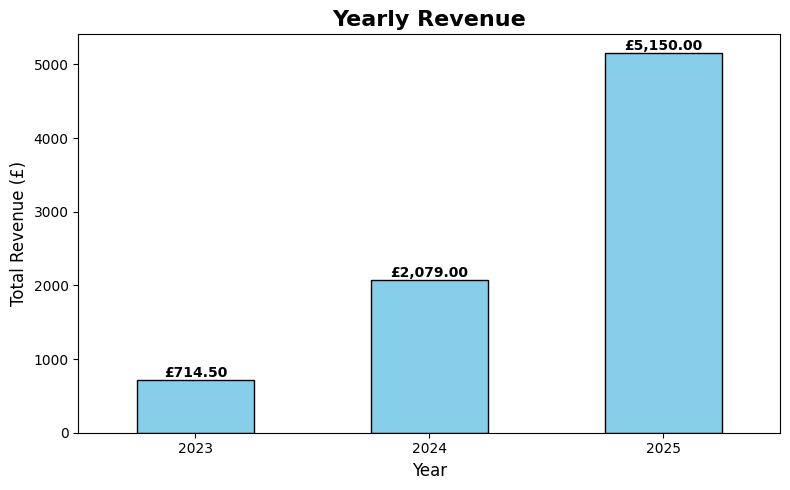

In [20]:
plt.figure(figsize=(8, 5))
ax = yearly_revenue.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1)

plt.title('Yearly Revenue', fontsize=16, fontweight='bold')
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xlabel('Year', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'£{height:,.2f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Monthly Revenue

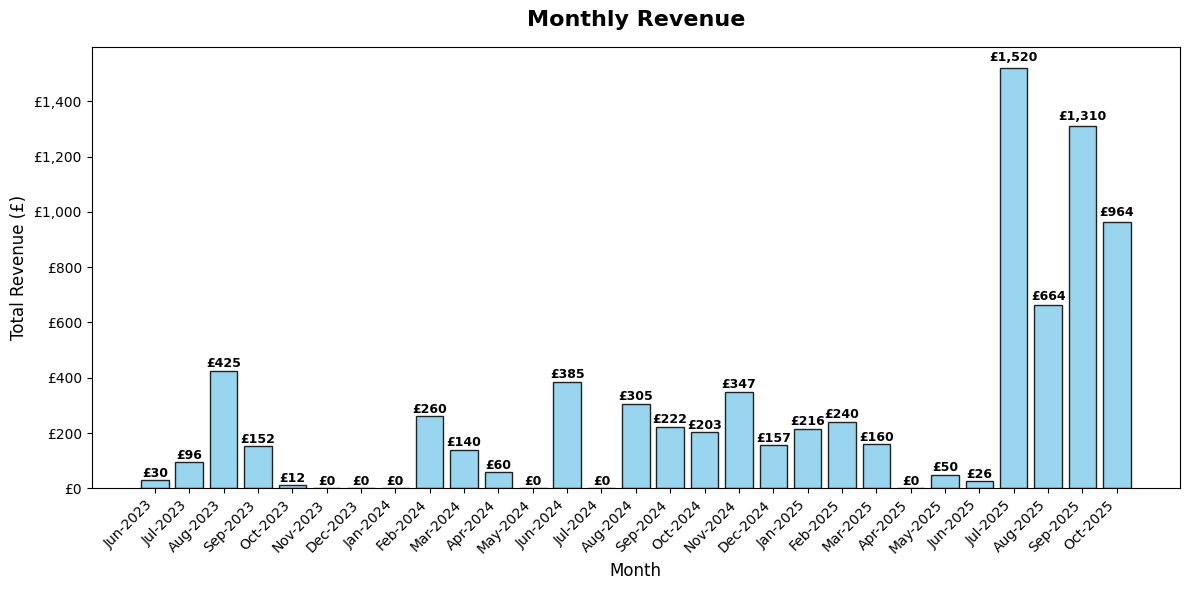

In [21]:
monthly_revenue = df.set_index('Date').resample('ME')['Amount'].sum()
plt.figure(figsize=(12, 6))
ax = plt.gca()

bars = ax.bar(range(len(monthly_revenue)), monthly_revenue, color='skyblue', edgecolor='black', alpha=0.85)

ax.set_xticks(range(len(monthly_revenue)))
ax.set_xticklabels(monthly_revenue.index.strftime('%b-%Y'), rotation=45, ha='right', fontsize=10)

plt.title('Monthly Revenue', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xlabel('Month', fontsize=12)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
            f'£{height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))

plt.tight_layout()
plt.show()

### Transactions Per Month

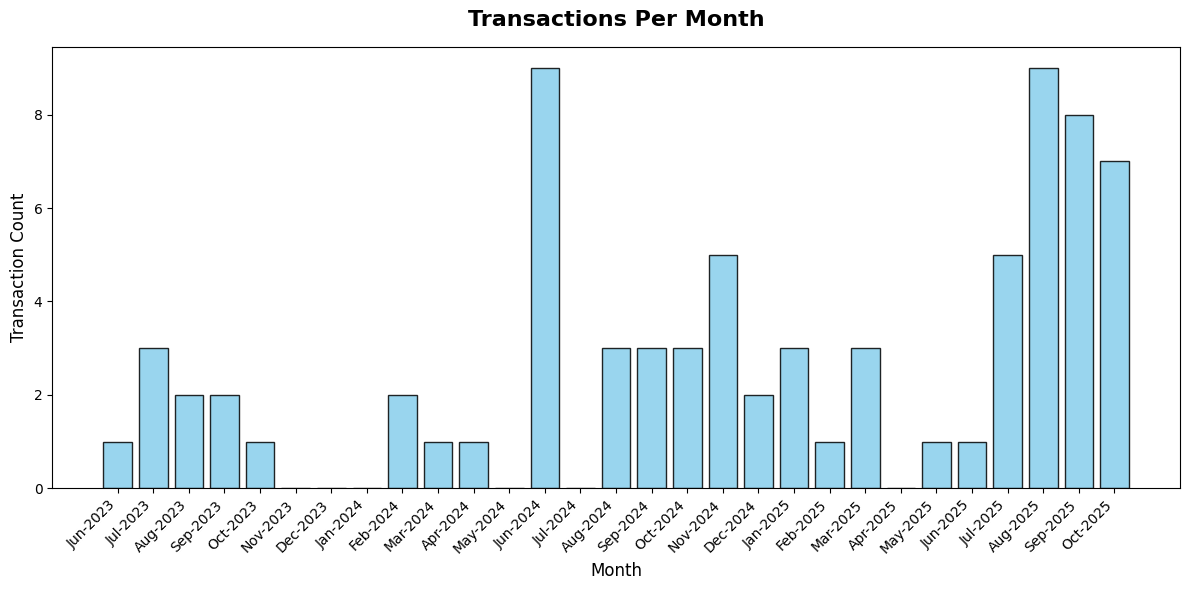

In [22]:
monthly_counts = df.set_index('Date').resample('ME')['Transaction_ID'].count()
plt.figure(figsize=(12, 6))
ax = plt.gca()

bars = ax.bar(range(len(monthly_counts)), monthly_counts, color='skyblue', edgecolor='black', alpha=0.85)
ax.set_xticks(range(len(monthly_counts)))
ax.set_xticklabels(monthly_counts.index.strftime('%b-%Y'), rotation=45, ha='right', fontsize=10)

plt.title('Transactions Per Month', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Transaction Count', fontsize=12)
plt.xlabel('Month', fontsize=12)

plt.tight_layout()
plt.show()

### Monthly Sales & Rolling Average

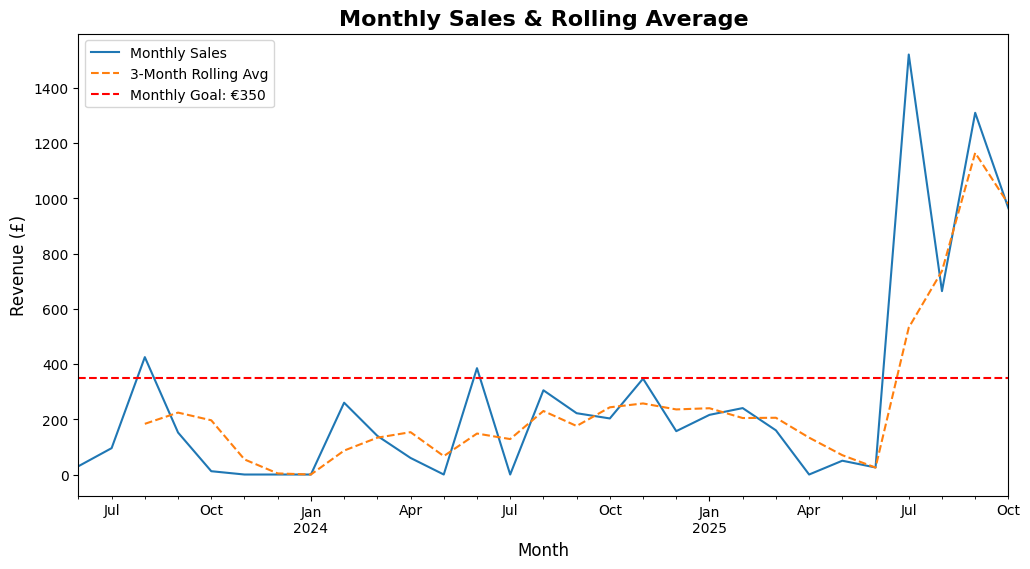

In [23]:
monthly_sales = df.resample('ME', on='Date')['Amount'].sum()
goal = 350  # monthly goal of £350 in revenue
goal_met = monthly_revenue >= goal

plt.figure(figsize=(12,6))
monthly_sales.plot(label='Monthly Sales')
monthly_sales.rolling(window=3).mean().plot(label='3-Month Rolling Avg', linestyle='--')
plt.axhline(goal, color='red', linestyle='--', label=f"Monthly Goal: €{goal}")
plt.title('Monthly Sales & Rolling Average', fontsize=16, fontweight='bold')
plt.ylabel('Revenue (£)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend()
plt.show()

### Cumulative Revenue Over Time

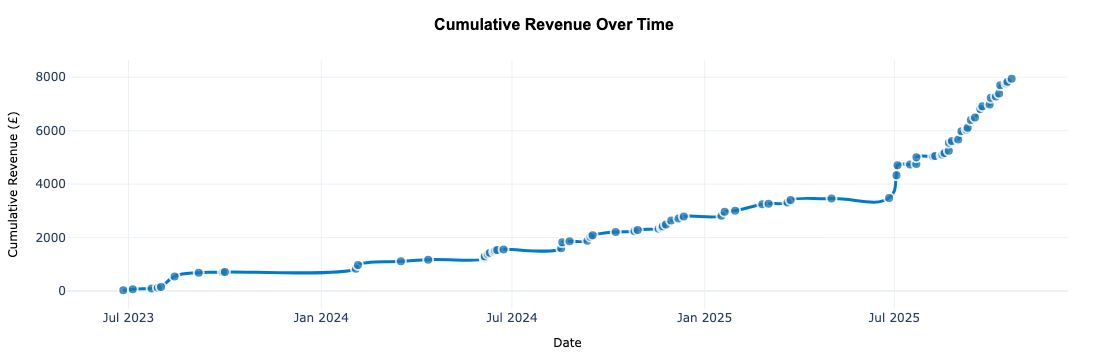

In [24]:
df_sorted['Cumulative Revenue'] = df_sorted['Amount'].cumsum()

fig = px.line(
    df_sorted,
    x='Date',
    y='Cumulative Revenue',
    markers=True,
    labels={'Date': 'Date', 'Cumulative Revenue': 'Cumulative Revenue (£)'},
    template='plotly_white'
)

fig.update_traces(
    hovertemplate=(
        '<span style="font-weight:bold; font-size:13px;">Date:</span> %{x|%d %b %Y}<br>'
        '<span style="font-weight:bold; font-size:13px;">Cumulative Revenue:</span> £%{y:,.2f}<extra></extra>'
    ),
    line=dict(color='#007ACC', width=3, shape='spline', smoothing=1.3),
    marker=dict(
        size=10,
        color='#1f77b4',
        line=dict(width=2, color='white'),
        opacity=0.8
    )
)

fig.update_layout(
    title=dict(
        text='Cumulative Revenue Over Time',
        font=dict(size=16, family='Arial', color='black', weight='bold'), 
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(text='Date', font=dict(size=12, color='black')) 
    ),
    yaxis=dict(
        title=dict(text='Cumulative Revenue (£)', font=dict(size=12, color='black'))  
    ),
    hoverlabel=dict(bgcolor='white', font_size=13),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show(config={
    'scrollZoom': False,
    'displayModeBar': False
})

### Transaction Amount Distribution

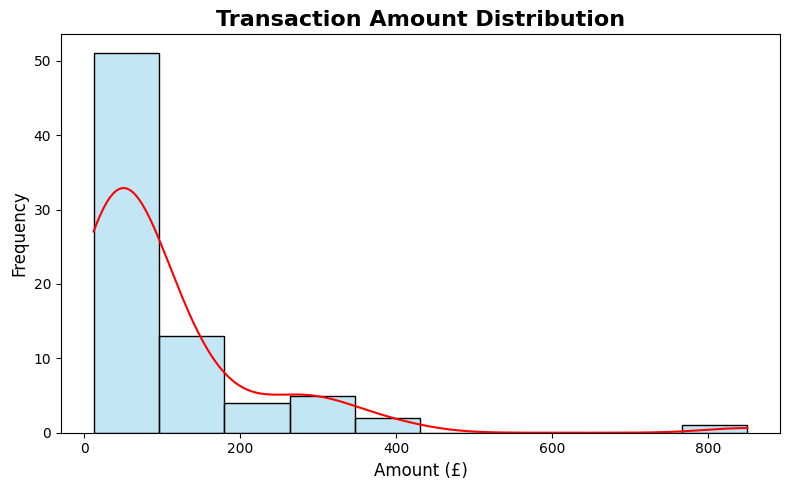

In [25]:
plt.figure(figsize=(8, 5))

ax = sns.histplot(df['Amount'], bins=10, kde=True, color='skyblue', edgecolor='black')
for line in ax.lines:
    line.set_color('red')
    
plt.title('Transaction Amount Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Amount (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

### Average Interval Per Transaction

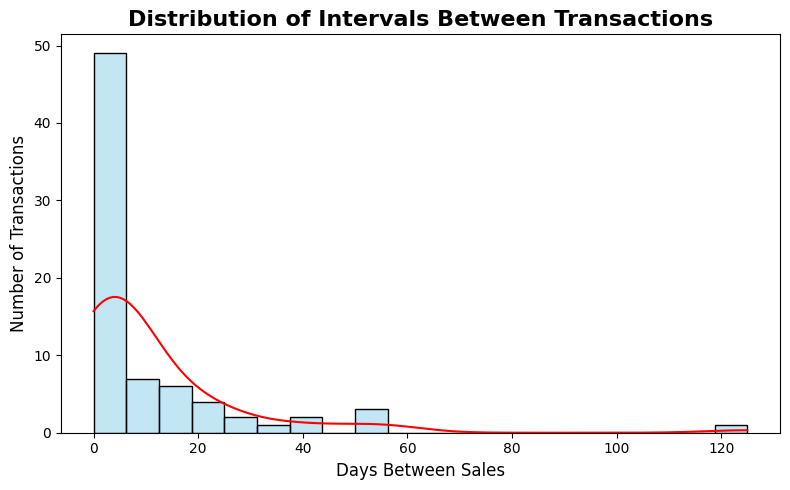

Average interval between transactions: 11.31 days


In [26]:
df_sorted = df.sort_values(by="Date")
df_sorted['Gap_Days'] = df_sorted['Date'].diff().dt.days
plt.figure(figsize=(8,5))
ax = sns.histplot(df_sorted['Gap_Days'].dropna(), bins=20, kde=True, color='skyblue', edgecolor='black')
for line in ax.lines:
    line.set_color('red')
    
plt.title('Distribution of Intervals Between Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Days Between Sales', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Average interval between transactions: {df_sorted['Gap_Days'].mean():.2f} days")

### Boxplot

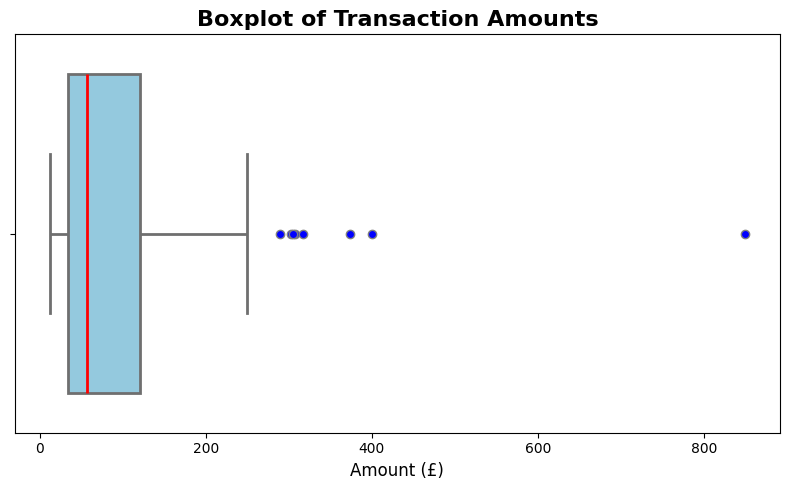

In [27]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x=df['Amount'], 
    color='skyblue', 
    linewidth=2, 
    fliersize=6,
    medianprops=dict(color='red', linewidth=2),
    flierprops=dict(
        marker='o',
        markerfacecolor='blue',
        markeredgecolor= 'grey',   
        markersize=6
    )
)

plt.title('Boxplot of Transaction Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Amount (£)', fontsize=12)

plt.tight_layout()
plt.show()

Monthly Revenue Stats:
 count      29.000000
mean      273.913793
std       384.327290
min         0.000000
25%        25.500000
50%       157.000000
75%       305.000000
max      1520.500000
Name: Amount, dtype: float64
Revenue Volatility (Std Dev): 384.3272895817331


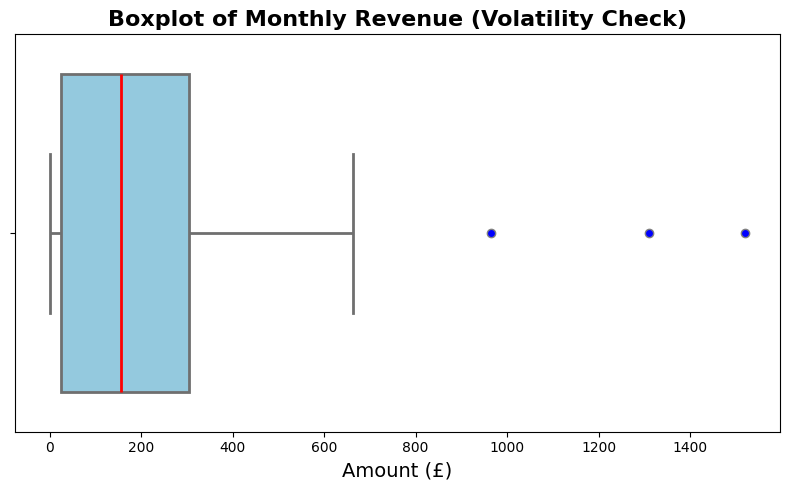

In [28]:
monthly_stats = monthly_sales.describe()
monthly_std = monthly_sales.std()

print("Monthly Revenue Stats:\n", monthly_stats)
print("Revenue Volatility (Std Dev):", monthly_std)

plt.figure(figsize=(8,5))
sns.boxplot(x=monthly_sales.values, 
    color='skyblue', 
    linewidth=2, 
    fliersize=6,
    medianprops=dict(color='red', linewidth=2),
    flierprops=dict(
        marker='o',
        markerfacecolor='blue', 
        markeredgecolor= 'grey',   
        markersize=6
    )
)

plt.title('Boxplot of Monthly Revenue (Volatility Check)', fontsize=16, fontweight='bold')
plt.xlabel('Amount (£)', fontsize=14)
plt.tight_layout()
plt.show()

### Revenue and Transactions by Month

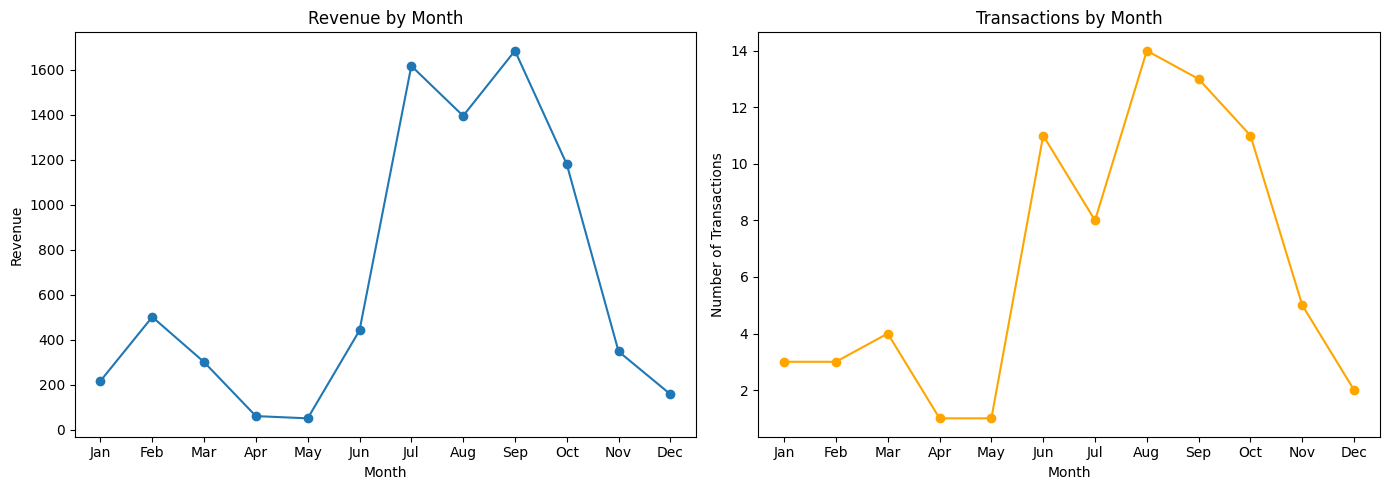

In [29]:
monthly_revenue = df.groupby(df['Date'].dt.month)['Amount'].sum()
monthly_transactions = df.groupby(df['Date'].dt.month)['Transaction_ID'].count()

fig, ax = plt.subplots(1, 2, figsize=(14,5))

monthly_revenue.plot(ax=ax[0], marker='o', title='Revenue by Month')
ax[0].set_xlabel('Month') 
ax[0].set_ylabel('Revenue')

monthly_transactions.plot(ax=ax[1], marker='o', color='orange', title='Transactions by Month')
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Number of Transactions')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for axis in ax:
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels(month_labels)
    axis.set_xlim(0.5, 12.5)

plt.tight_layout()
plt.show()